# Preparation

In [1]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# pip install graphviz

# Read Data

In [3]:
df = pd.read_excel("D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24.xlsx", sheet_name="Sumber Data")
df = df.drop(columns=['TanggalJamMulai1','TanggalJamSelesai1'])
df.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK1,NIK2,NIK3,NIK4,NIK5,NIK6,Trax,menit,Unnamed: 42,ket 2
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,26498,79063,NaN,NaN,NaN,1,NaN,NaN,NaN
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,26498,79063,NaN,NaN,NaN,1,NaN,NaN,NaN
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,26498,79063,NaN,NaN,NaN,1,NaN,NaN,NaN
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,26498,79063,NaN,NaN,NaN,1,NaN,NaN,NaN
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,26498,79063,NaN,NaN,NaN,2,NaN,NaN,NaN


In [4]:
df['Oplah'].describe()

count      1834.000000
mean      34530.446020
std       37937.711916
min           0.000000
25%        4000.000000
50%       20000.000000
75%       64745.000000
max      200000.000000
Name: Oplah, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Mesin           1834 non-null   int64         
 1   KodePekerjaan   1834 non-null   int64         
 2   NoOrder         1834 non-null   int64         
 3   Judul           1834 non-null   object        
 4   NoKatern1       1834 non-null   object        
 5   NoKatern2       1825 non-null   object        
 6   Warna           1834 non-null   int64         
 7   Teller          215 non-null    float64       
 8   HasilRusak      0 non-null      float64       
 9   compute_0014    1834 non-null   object        
 10  NamaMesin       1834 non-null   object        
 11  NamaPekerjaan   1834 non-null   object        
 12  compute_0017    0 non-null      float64       
 13  compute_0018    0 non-null      float64       
 14  compute_0019    0 non-null      float64       
 15  comp

In [6]:
df['TanggalJamMulai'] = df['TanggalMulai'].astype(str) + ' ' + df['JamMulai']
df['TanggalJamSelesai'] = df['TanggalSelesai'].astype(str) + ' ' + df['JamSelesai']

df

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK3,NIK4,NIK5,NIK6,Trax,menit,Unnamed: 42,ket 2,TanggalJamMulai,TanggalJamSelesai
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,79063,NaN,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,79063,NaN,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,79063,NaN,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,79063,NaN,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,79063,NaN,NaN,NaN,2,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,13,...,dzikr,NaN,NaN,NaN,244,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43
1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,dzikr,NaN,NaN,NaN,244,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00
1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,2100.0,NaN,0,...,dzikr,NaN,NaN,NaN,244,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14
1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,dzikr,NaN,NaN,NaN,244,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24


In [7]:
df['TanggalJamMulai'] = pd.to_datetime(df['TanggalJamMulai'])
df['TanggalJamSelesai'] = pd.to_datetime(df['TanggalJamSelesai'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Mesin              1834 non-null   int64         
 1   KodePekerjaan      1834 non-null   int64         
 2   NoOrder            1834 non-null   int64         
 3   Judul              1834 non-null   object        
 4   NoKatern1          1834 non-null   object        
 5   NoKatern2          1825 non-null   object        
 6   Warna              1834 non-null   int64         
 7   Teller             215 non-null    float64       
 8   HasilRusak         0 non-null      float64       
 9   compute_0014       1834 non-null   object        
 10  NamaMesin          1834 non-null   object        
 11  NamaPekerjaan      1834 non-null   object        
 12  compute_0017       0 non-null      float64       
 13  compute_0018       0 non-null      float64       
 14  compute_

# Cleaning Data

## Label Encoding

In [8]:
df_new = df

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df_new['Judul'])

df_new.drop('Judul', axis=1, inplace=True)
df_new['Judul'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NoKatern1'])

df_new.drop('NoKatern1', axis=1, inplace=True)
df_new['NoKatern1'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NoKatern2'])

df_new.drop('NoKatern2', axis=1, inplace=True)
df_new['NoKatern2'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NamaPekerjaan'])

df_new.drop('NamaPekerjaan', axis=1, inplace=True)
df_new['NamaPekerjaan'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['NamaMesin'])

df_new.drop('NamaMesin', axis=1, inplace=True)
df_new['NamaMesin'] = label

le = LabelEncoder()
label = le.fit_transform(df_new['Keterangan'])

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Mesin              1834 non-null   int64         
 1   KodePekerjaan      1834 non-null   int64         
 2   NoOrder            1834 non-null   int64         
 3   Warna              1834 non-null   int64         
 4   Teller             215 non-null    float64       
 5   HasilRusak         0 non-null      float64       
 6   compute_0014       1834 non-null   object        
 7   compute_0017       0 non-null      float64       
 8   compute_0018       0 non-null      float64       
 9   compute_0019       0 non-null      float64       
 10  compute_0020       0 non-null      float64       
 11  compute_0021       0 non-null      float64       
 12  compute_0022       0 non-null      float64       
 13  compute_0023       0 non-null      float64       
 14  compute_

In [11]:
# df_new = df.select_dtypes(exclude=['object'])
# # df_date_selesai = df_date_selesai.drop(columns = ['KodePekerjaan','NoOrder','Mesin','NIK2','TanggalJamMulai1','Produksi','compute_0026','compute_0027'])
# df_new

## Drop Unused Columns

In [12]:
df_new = df_new.drop(columns = ['HasilRusak','NIK4','NIK5','Unnamed: 42','menit','NIK6','ket 2','NIK1',
                                'NIK2','NIK3','NIK4','NIK5','NIK6','Teller','TanggalJamMulai','TanggalJamSelesai',
                                'TanggalSelesai','TanggalMulai','KodePekerjaan','NoOrder','Produksi','Keterangan'])
df_new = df_new.select_dtypes(exclude=['object'])
df_new.fillna(0,inplace=True)
# df_new = df_new.drop(columns = ['Unnamed: 42','\'])

In [13]:
df_new.isna().sum()

Mesin            0
Warna            0
compute_0017     0
compute_0018     0
compute_0019     0
compute_0020     0
compute_0021     0
compute_0022     0
compute_0023     0
compute_0024     0
compute_0026     0
compute_0027     0
compute_0028     0
compute_0029     0
Shift            0
Oplah            0
Trax             0
Judul            0
NoKatern1        0
NoKatern2        0
NamaPekerjaan    0
NamaMesin        0
dtype: int64

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mesin          1834 non-null   int64  
 1   Warna          1834 non-null   int64  
 2   compute_0017   1834 non-null   float64
 3   compute_0018   1834 non-null   float64
 4   compute_0019   1834 non-null   float64
 5   compute_0020   1834 non-null   float64
 6   compute_0021   1834 non-null   float64
 7   compute_0022   1834 non-null   float64
 8   compute_0023   1834 non-null   float64
 9   compute_0024   1834 non-null   float64
 10  compute_0026   1834 non-null   int64  
 11  compute_0027   1834 non-null   int64  
 12  compute_0028   1834 non-null   float64
 13  compute_0029   1834 non-null   float64
 14  Shift          1834 non-null   int64  
 15  Oplah          1834 non-null   int64  
 16  Trax           1834 non-null   int64  
 17  Judul          1834 non-null   int32  
 18  NoKatern

In [15]:
# plt.figure(figsize=(14,6))
# sns.boxplot(x='Warna', y='Oplah',hue='Warna',data=df_new,palette='rainbow')
# plt.title('Box plot of charges vs children');

# Modelling

In [16]:
X = df_new.drop('Judul', axis=1)
y = df_new['Judul']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# X_train.info()
# # X_train = X_train.drop(columns = ['TanggalJamSelesai']

## Random Forest

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1283 entries, 425 to 1529
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mesin          1283 non-null   int64  
 1   Warna          1283 non-null   int64  
 2   compute_0017   1283 non-null   float64
 3   compute_0018   1283 non-null   float64
 4   compute_0019   1283 non-null   float64
 5   compute_0020   1283 non-null   float64
 6   compute_0021   1283 non-null   float64
 7   compute_0022   1283 non-null   float64
 8   compute_0023   1283 non-null   float64
 9   compute_0024   1283 non-null   float64
 10  compute_0026   1283 non-null   int64  
 11  compute_0027   1283 non-null   int64  
 12  compute_0028   1283 non-null   float64
 13  compute_0029   1283 non-null   float64
 14  Shift          1283 non-null   int64  
 15  Oplah          1283 non-null   int64  
 16  Trax           1283 non-null   int64  
 17  NoKatern1      1283 non-null   int32  
 18  NoKatern2  

In [19]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = rf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9727767695099818


In [22]:
# conda install python-graphviz


In [23]:
# pip install --upgrade sklearn
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [24]:
# !pip install --upgrade sklearn

## Linear Regression

In [25]:
# df_new2 = df_new[['Oplah','Judul','NamaPekerjaan','NamaMesin','Warna','Shift','Trax']]


In [26]:
# ## Regresi Linier Tenaga Kerja <-- Jumlah Proyek + Tahun (without a constant)

# import statsmodels.api as sm

# X = df_new2.iloc[:,1:21]
# #X = sm.add_constant(X) # add an intercept (beta_0) to our model
# y = df_new2['Oplah']

# # Note the difference in argument order
# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
# model.summary()

## Isolation Forest

In [27]:
df_raw = pd.read_excel("D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24.xlsx", sheet_name="Sumber Data")
df_raw = df_raw.drop(columns=['TanggalJamMulai1','TanggalJamSelesai1'])
df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK1,NIK2,NIK3,NIK4,NIK5,NIK6,Trax,menit,Unnamed: 42,ket 2
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,26498,79063,NaN,NaN,NaN,1,NaN,NaN,NaN
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,26498,79063,NaN,NaN,NaN,1,NaN,NaN,NaN
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,26498,79063,NaN,NaN,NaN,1,NaN,NaN,NaN
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,26498,79063,NaN,NaN,NaN,1,NaN,NaN,NaN
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,26498,79063,NaN,NaN,NaN,2,NaN,NaN,NaN


In [28]:
df_raw['TanggalJamMulai'] = df_raw['TanggalMulai'].astype(str) + ' ' + df_raw['JamMulai']
df_raw['TanggalJamSelesai'] = df_raw['TanggalSelesai'].astype(str) + ' ' + df_raw['JamSelesai']


df_raw['TanggalJamMulai'] = pd.to_datetime(df_raw['TanggalJamMulai'])
df_raw['TanggalJamSelesai'] = pd.to_datetime(df_raw['TanggalJamSelesai'])

df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK3,NIK4,NIK5,NIK6,Trax,menit,Unnamed: 42,ket 2,TanggalJamMulai,TanggalJamSelesai
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,79063,NaN,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,79063,NaN,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,79063,NaN,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,79063,NaN,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,79063,NaN,NaN,NaN,2,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18


In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Mesin              1834 non-null   int64         
 1   KodePekerjaan      1834 non-null   int64         
 2   NoOrder            1834 non-null   int64         
 3   Judul              1834 non-null   object        
 4   NoKatern1          1834 non-null   object        
 5   NoKatern2          1825 non-null   object        
 6   Warna              1834 non-null   int64         
 7   Teller             215 non-null    float64       
 8   HasilRusak         0 non-null      float64       
 9   compute_0014       1834 non-null   object        
 10  NamaMesin          1834 non-null   object        
 11  NamaPekerjaan      1834 non-null   object        
 12  compute_0017       0 non-null      float64       
 13  compute_0018       0 non-null      float64       
 14  compute_

In [30]:
from sklearn.ensemble import IsolationForest 

modelif = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.2), max_features=1.0)
modelif.fit(df_new[['Oplah']])

IsolationForest(contamination=0.2)

In [31]:
df_raw['anomaly_scores']=modelif.decision_function(df_new[['Oplah']])
df_raw['anomaly']=modelif.predict(df_new[['Oplah']])
df_new['anomaly_scores']=modelif.decision_function(df_new[['Oplah']])
df_new['anomaly']=modelif.predict(df_new[['Oplah']])
df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK5,NIK6,Trax,menit,Unnamed: 42,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.010167,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.010167,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.010167,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,1,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.010167,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,NaN,2,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.275120,-1


In [32]:
# sns.lmplot(x='Oplah',y='anomaly_scores',data=df_raw,aspect=2,height=6)
# plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
# plt.ylabel('Insurance Charges: as Dependent variable')
# plt.title('Charge Vs BMI');

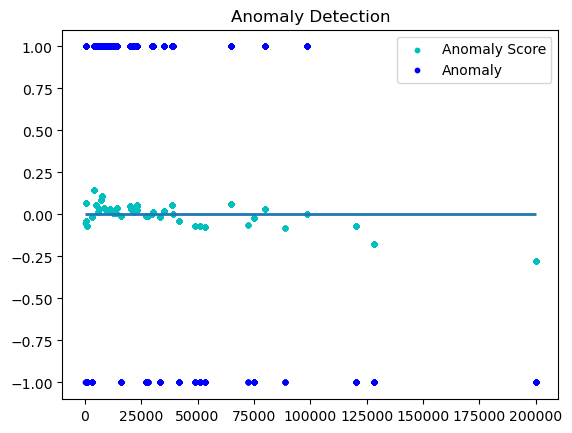

In [33]:
plt.scatter(df_raw['Oplah'],
            df_raw['anomaly_scores'],
            color="c", s=10,
            label='Anomaly Score')
 
# plotting residual errors in test data
plt.scatter(df_raw['Oplah'],
            df_raw['anomaly'],
            color="blue", s=10,
            label='Anomaly')
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=df['Oplah'].max(), linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Anomaly Detection")
 
# method call for showing the plot
plt.show()

In [34]:
pd.value_counts(df_raw['anomaly'])

anomaly
 1    1560
-1     274
Name: count, dtype: int64

<Axes: xlabel='anomaly', ylabel='count'>

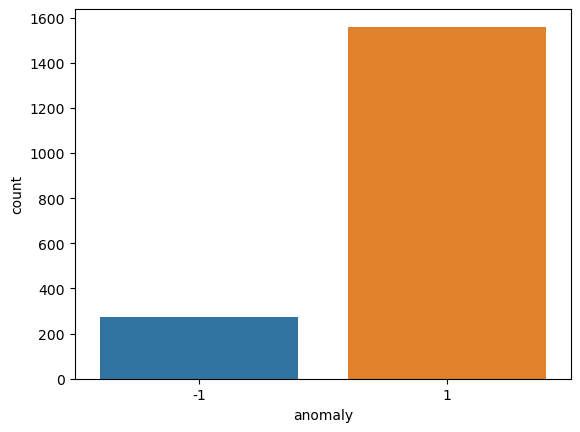

In [35]:
sns.countplot(x='anomaly', data=df_raw)

## Median Absolute Deviation

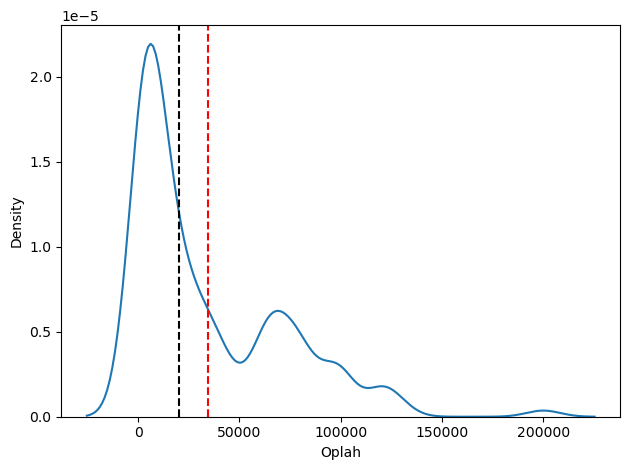

In [36]:
import seaborn as sns

sns.kdeplot(df_raw['Oplah']);
plt.grid(False)
plt.axvline(20000, 0, 1, c='black', ls='--')
plt.axvline(34530.44601962923, 0, 1, c='red', ls='--')

plt.tight_layout()

In [37]:
pd.value_counts(df_raw['Oplah'])

Oplah
4000      329
64745     174
492       125
7500      106
98399     105
80000     102
38650      63
120100     55
7000       53
20000      50
75000      46
14347      43
35000      42
4710       41
23034      32
30206      26
20965      20
23115      19
6060       18
128193     17
11178      17
27242      17
10000      15
200000     14
23185      14
10968      14
21843      13
20360      13
16187      13
41649      13
8307       12
400        12
51018      12
9852       12
29724      12
39066      12
1000       12
3000       12
53299      11
33167      11
21356      11
11768      11
12362      10
13605      10
49011      10
8370        9
5661        9
28029       7
12210       7
88962       6
11124       6
72319       5
13544       4
8340        1
0           1
Name: count, dtype: int64

In [38]:
# de = pd.read_csv("C:/Users/ASUS/Downloads/ec2_cpu_utilization_24ae8d.csv")
# de

In [39]:
# mean = np.median(de['value'])
# print(mean)

In [40]:
# df_raw['Oplah'].median()

In [41]:
from scipy.stats import median_abs_deviation

mad = median_abs_deviation(df_raw['Oplah'])
median = np.median(df_raw['Oplah'])
mean = np.mean(df_raw['Oplah'])

print(mad)
print(median)
print(mean)

def compute_robust_z_score(x):
    return 0.6745*(x-median)/mad

16000.0
20000.0
34530.44601962923


In [42]:
df_raw['z-score'] = df_raw['Oplah'].apply(compute_robust_z_score)
df_new['z-score'] = df_raw['Oplah'].apply(compute_robust_z_score)

df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,NIK6,Trax,menit,Unnamed: 42,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,1,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.010167,1,-0.272161
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,1,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.010167,1,-0.272161
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,1,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.010167,1,-0.272161
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,1,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.010167,1,-0.272161
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,2,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.275120,-1,7.588125


In [43]:
# df_new

In [44]:
df_raw['z-score'].value_counts()

z-score
-0.674500    329
 1.886281    174
-0.822384    125
-0.526953    106
 3.305008    105
 2.529375    102
 0.786214     63
 4.219841     55
-0.548031     53
 0.000000     50
 2.318594     46
-0.238309     43
 0.632344     42
-0.644569     41
 0.127902     32
 0.430247     26
 0.040681     20
 0.131317     19
-0.587658     18
 4.561011     17
-0.371902     17
 0.305296     17
-0.421563     15
 7.588125     14
 0.134268     14
-0.380755     14
 0.077694     13
 0.015176     13
-0.160742     13
 0.912641     13
-0.492933     12
-0.826262     12
 1.307603     12
-0.427802     12
 0.409927     12
 0.803751     12
-0.800969     12
-0.716656     12
 1.403761     11
 0.555071     11
 0.057164     11
-0.347030     11
-0.321989     10
-0.269589     10
 1.222995     10
-0.490277      9
-0.604478      9
 0.338473      7
-0.328397      7
 2.907179      6
-0.374179      6
 2.205573      5
-0.272161      4
-0.491542      1
-0.843125      1
Name: count, dtype: int64

In [45]:
df_raw['baseline'] = 1
df_new['baseline'] = 1

df_raw.loc[df_raw['z-score'] >= 3.5, 'baseline'] = -1
df_raw.loc[df_raw['z-score'] <= -3.5, 'baseline'] = -1
df_new.loc[df_new['z-score'] >= 3.5, 'baseline'] = -1
df_new.loc[df_new['z-score'] <= -3.5, 'baseline'] = -1

In [46]:
anomalies_timestamp = [
    "2024-01-02 07:01:45"
    "2024-01-03 23:45:01"
]

In [47]:
# df_raw['TanggalJamMulai1'] = pd.to_datetime(df['TanggalJamMulai1'])
# df_raw['TanggalJamSelesai1'] = pd.to_datetime(df['TanggalJamSelesai1'])
# df_raw.head()

In [48]:
df_raw['is_anomaly'] = 1

for each in anomalies_timestamp:
    df_raw.loc[df_raw['TanggalJamMulai'] == each, 'is_anomaly'] = -1
    
df_raw.head()

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,menit,Unnamed: 42,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline,is_anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.010167,1,-0.272161,1,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.010167,1,-0.272161,1,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.010167,1,-0.272161,1,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.010167,1,-0.272161,1,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.275120,-1,7.588125,-1,1


In [49]:
anomaly_df = df_raw.loc[df_raw['is_anomaly'] == -1]
inlier_df = df_raw.loc[df_raw['is_anomaly'] == 1]
df_raw

,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,compute_0014,...,menit,Unnamed: 42,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline,is_anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.010167,1,-0.272161,1,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.010167,1,-0.272161,1,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,1,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.010167,1,-0.272161,1,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,CO,B,44,NaN,NaN,28,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.010167,1,-0.272161,1,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,3B,4B,20,NaN,NaN,0,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.275120,-1,7.588125,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,13,...,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.059332,1,-0.644569,1,1
1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.059332,1,-0.644569,1,1
1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,2100.0,NaN,0,...,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.059332,1,-0.644569,1,1
1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,A,44,NaN,NaN,6,...,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.059332,1,-0.644569,1,1


In [50]:
# df_raw['is_anomaly'].value_counts()

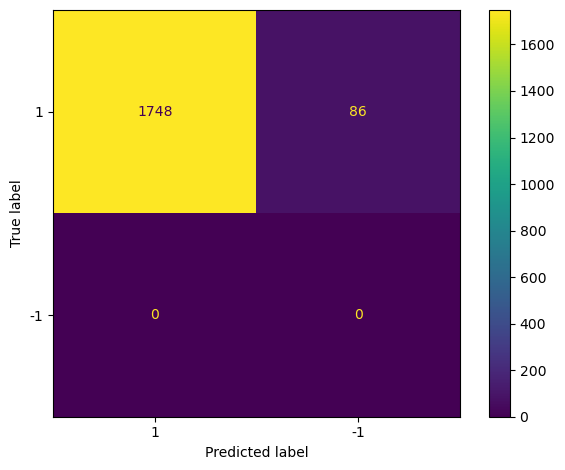

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_raw['is_anomaly'], df_raw['baseline'], labels=[1, -1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1, -1])

disp_cm.plot();

plt.grid(False)
plt.tight_layout()

In [52]:
# df_raw.to_excel('D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24_proc.xlsx')


In [52]:
# df_raw.to_csv('D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24_proc.csv')

## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=5)

model.fit(X, y)

DecisionTreeClassifier(max_depth=5)

In [62]:
modelif

IsolationForest(contamination=0.2)

In [64]:
# # Export the first three decision trees from the forest


# for i in range(3):
#     tree = modelif.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

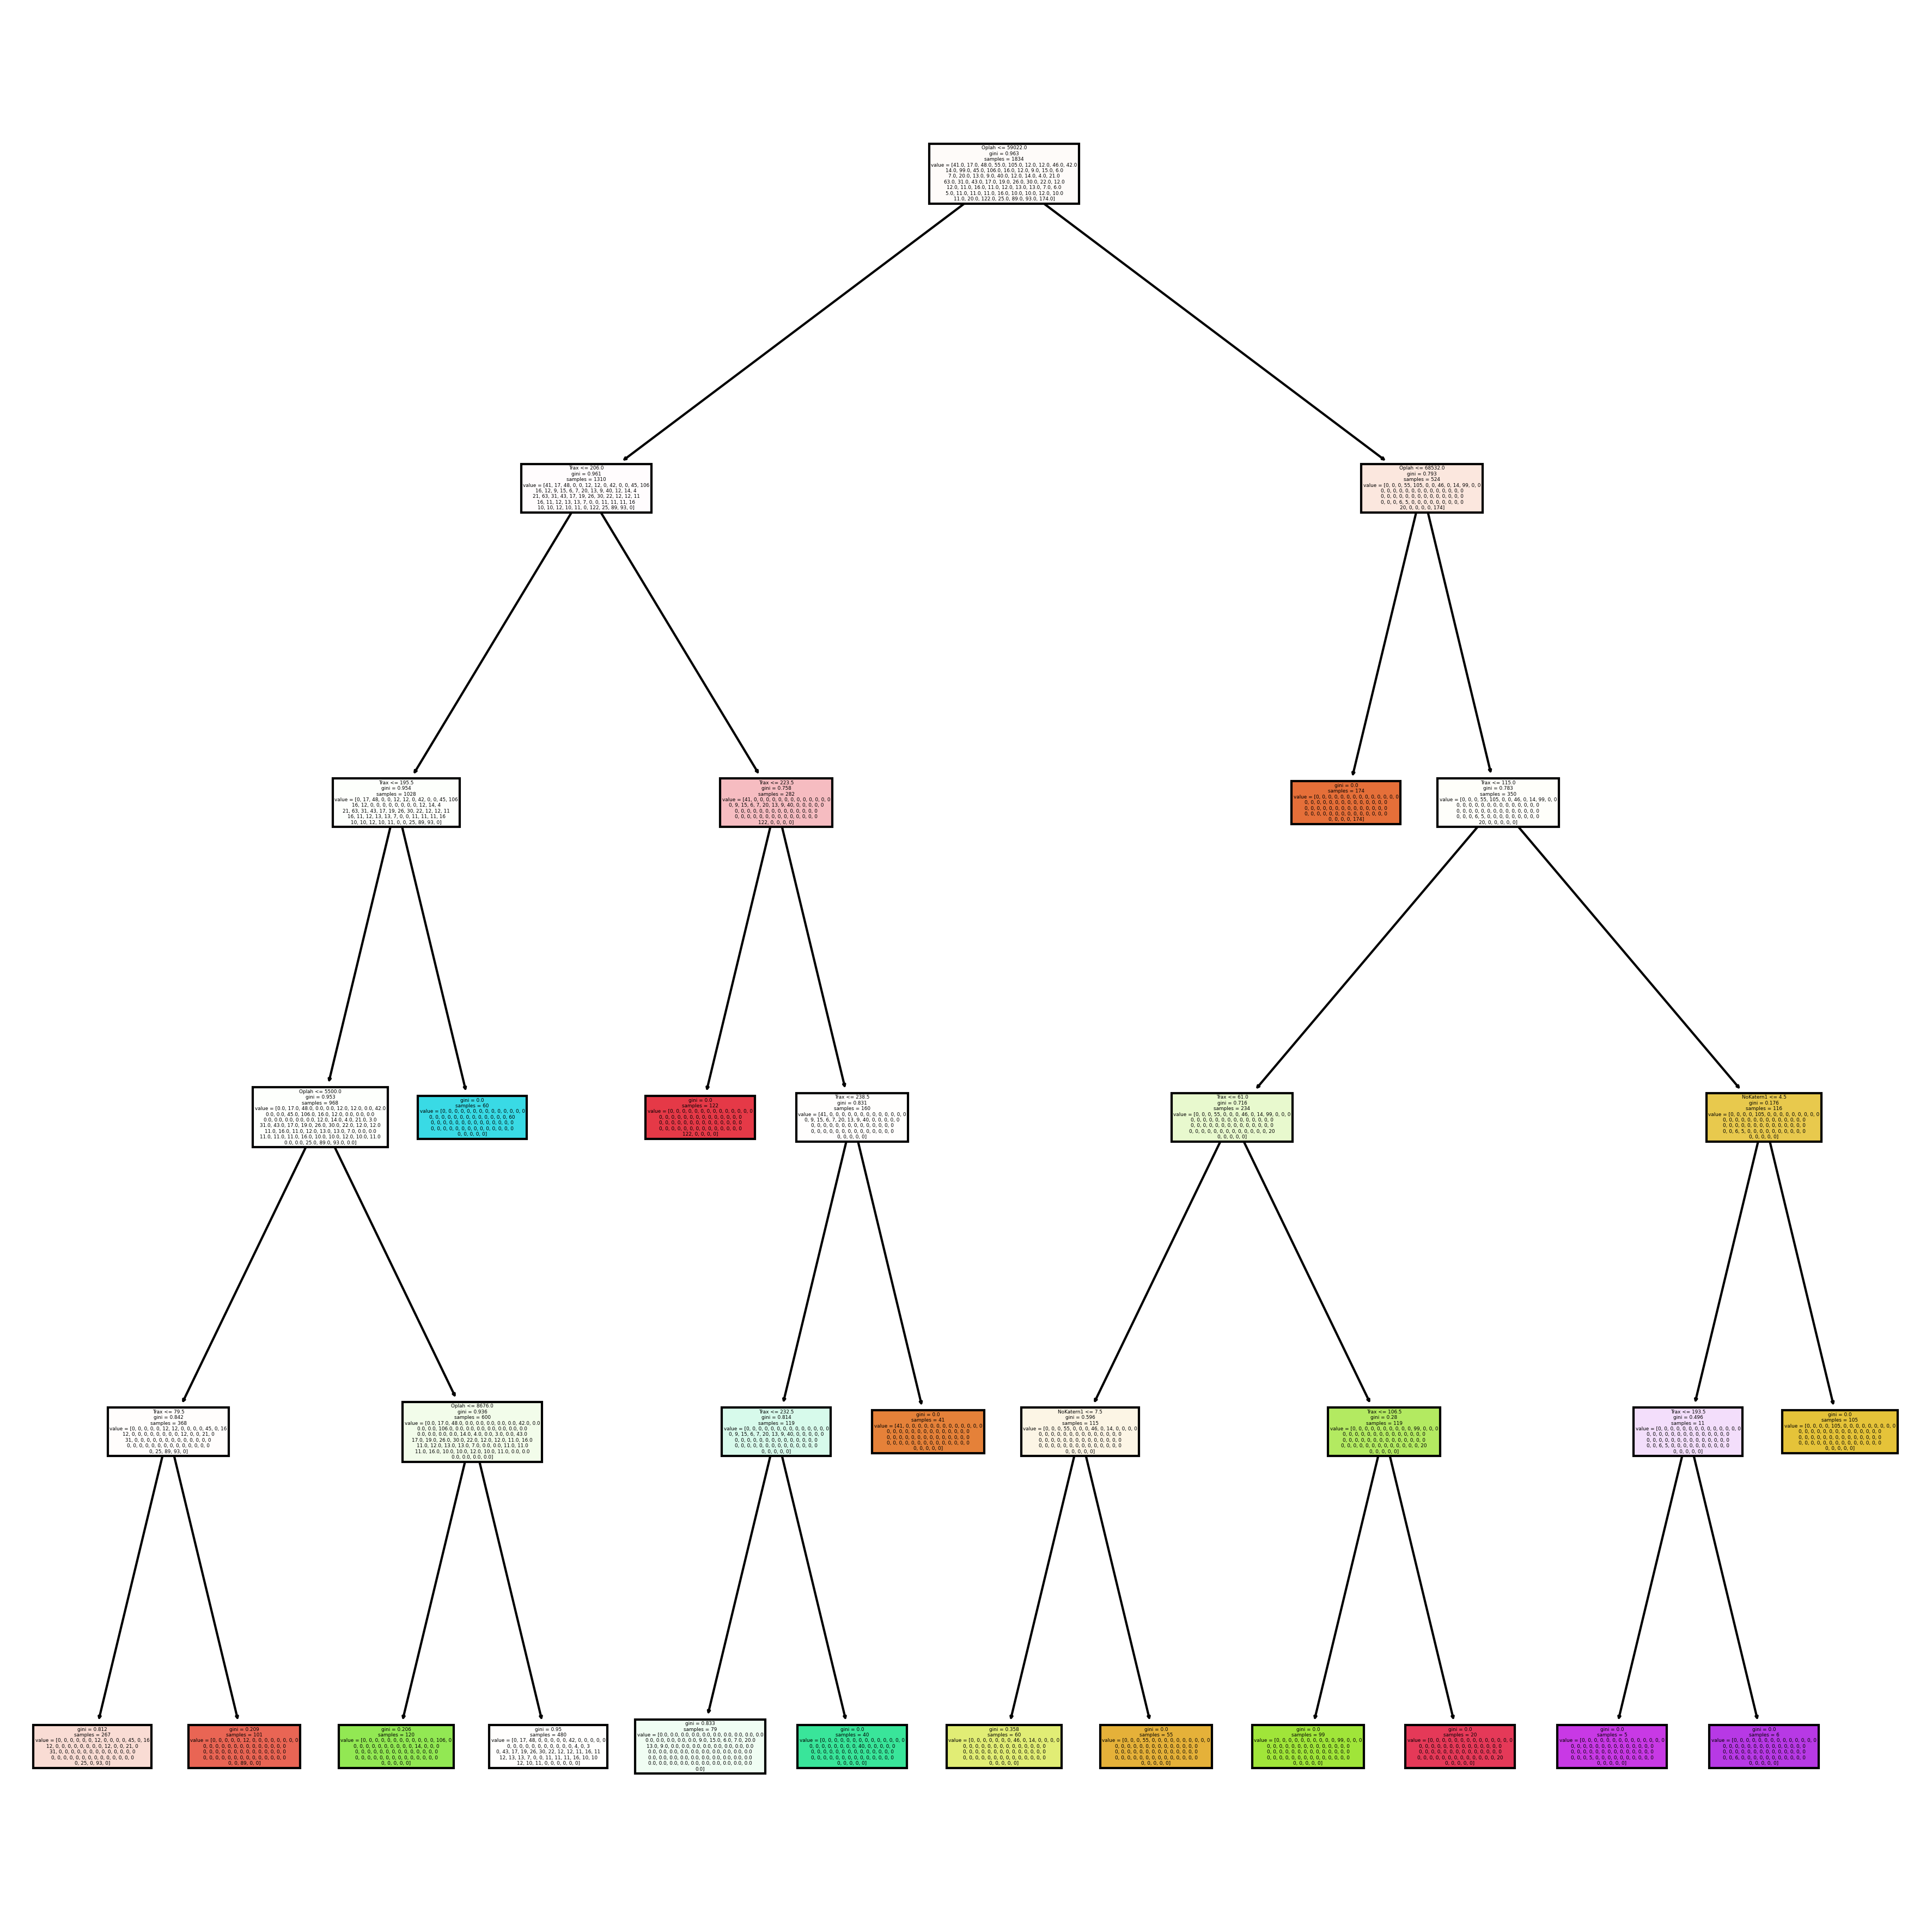

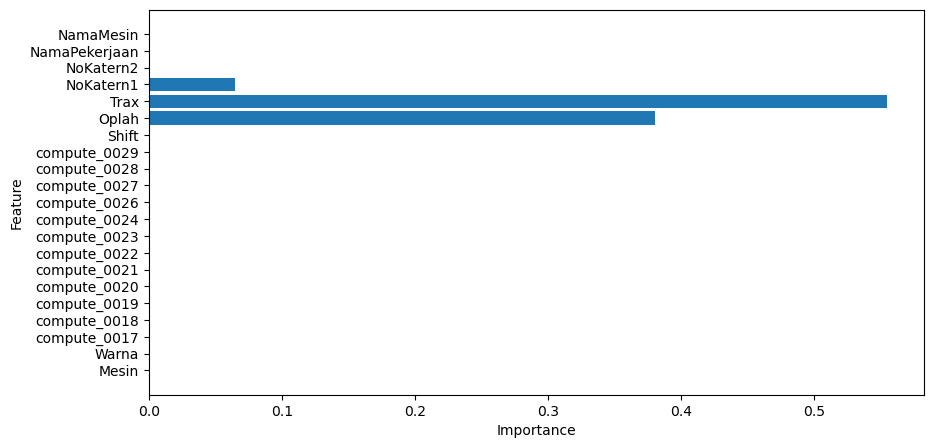

In [63]:
import sklearn.tree as tree

plt.figure(figsize=(15,15), dpi = 300)
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

plt.figure(figsize=(10,5))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [65]:
df_raw.drop(['NIK3','compute_0014','NoKatern1','NoKatern2'], axis="columns", inplace=True)

In [66]:
categorical_col = []
for column in df_raw.columns:
    if df_raw[column].dtype == object and len(df_raw[column].unique()) <= 2000:
        categorical_col.append(column)
        
df['Judul'] = df_raw.Judul.astype("category").cat.codes

categorical_col.remove('Judul')

In [67]:
categorical_col

['NamaMesin', 'NamaPekerjaan', 'JamMulai', 'JamSelesai', 'Keterangan']

In [68]:
df_raw.isnull().any()

Mesin                False
KodePekerjaan        False
NoOrder              False
Judul                False
Warna                False
Teller                True
HasilRusak            True
NamaMesin            False
NamaPekerjaan        False
compute_0017          True
compute_0018          True
compute_0019          True
compute_0020          True
compute_0021          True
compute_0022          True
compute_0023          True
compute_0024          True
Produksi             False
compute_0026         False
compute_0027         False
compute_0028          True
compute_0029          True
TanggalMulai         False
TanggalSelesai       False
Shift                False
JamMulai             False
JamSelesai           False
Oplah                False
Keterangan            True
NIK1                  True
NIK2                 False
NIK4                  True
NIK5                  True
NIK6                  True
Trax                 False
menit                 True
Unnamed: 42           True
k

In [69]:
df_raw

,Mesin,KodePekerjaan,NoOrder,Judul,Warna,Teller,HasilRusak,NamaMesin,NamaPekerjaan,compute_0017,...,menit,Unnamed: 42,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline,is_anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Input NIK,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.017628,1,-0.272161,1,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Gang.Unit Pembasah,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.017628,1,-0.272161,1,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Starting,NaN,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.017628,1,-0.272161,1,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Starting,NaN,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.017628,1,-0.272161,1,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,20,NaN,NaN,KBA,Input No. Order,NaN,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.276267,-1,7.588125,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Persiapan,NaN,...,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.052910,1,-0.644569,1,1
1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Produksi/cetak,NaN,...,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.052910,1,-0.644569,1,1
1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,2100.0,NaN,KBA,Input Teller Sementara,NaN,...,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.052910,1,-0.644569,1,1
1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Gang.Gosok Blanket,NaN,...,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.052910,1,-0.644569,1,1


In [70]:
from sklearn.preprocessing import LabelEncoder

df_raw_new = df_raw.select_dtypes(exclude=['object'])
# df_raw_new = df_raw_new.drop(columns=['compute_0014'])
label = LabelEncoder()
for column in df_raw_new:
    df_raw_new[column] = label.fit_transform(df_raw_new[column])

In [71]:
# categorical_col
# for col in df_raw_new.columns[:]:
#     print(col)
#     print(df_raw_new[col].unique())
#     print()

In [72]:
# df_raw[column]wwwwwwwwwwwww[qd ]

In [73]:
from sklearn.model_selection import train_test_split

X = df_new.drop('Judul', axis=1)
y = df_raw.Judul

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [75]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.12%
_______________________________________________
CLASSIFICATION REPORT:
           AL HAROMAIN ED. FEBRUARI 2024  AL-QUR'AN GARIS AR RAHMAN B5  \
precision                            1.0                      1.000000   
recall                               1.0                      0.142857   
f1-score                             1.0                      0.250000   
support                             31.0                     14.000000   

           AL-QUR'AN KHAT ASY-SYIFA GARIS A4  ALFA MART DC SURABAYA ED. 02  \
precision                                1.0                           1.0   
recall                                   1.0                           1.0   
f1-score                                 1.0                           1.0   
support                                 39.0                          43.0   

           ALFA MART DC SURABAYA ED. 03  \
precision                           1.0   
recall                              1.0   
f

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\s

In [76]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# params = {
#     "criterion":("gini", "entropy"), 
#     "splitter":("best", "random"), 
#     "max_depth":(list(range(1, 20))), 
#     "min_samples_split":[2, 3, 4], 
#     "min_samples_leaf":list(range(1, 20)), 
# }


# tree_clf = DecisionTreeClassifier(random_state=42)
# tree_cv = GridSearchCV(
#     tree_clf, 
#     params, 
#     scoring="f1", 
#     n_jobs=-1, 
#     verbose=1, 
#     cv=5
# )

# tree_cv.fit(X_train, y_train)
# best_params = tree_cv.best_params_
# print(f"Best paramters: {best_params})")

# tree_clf = DecisionTreeClassifier(**best_params)
# tree_clf.fit(X_train, y_train)
# print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
# print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [77]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df_new.columns)
features.remove("Judul")

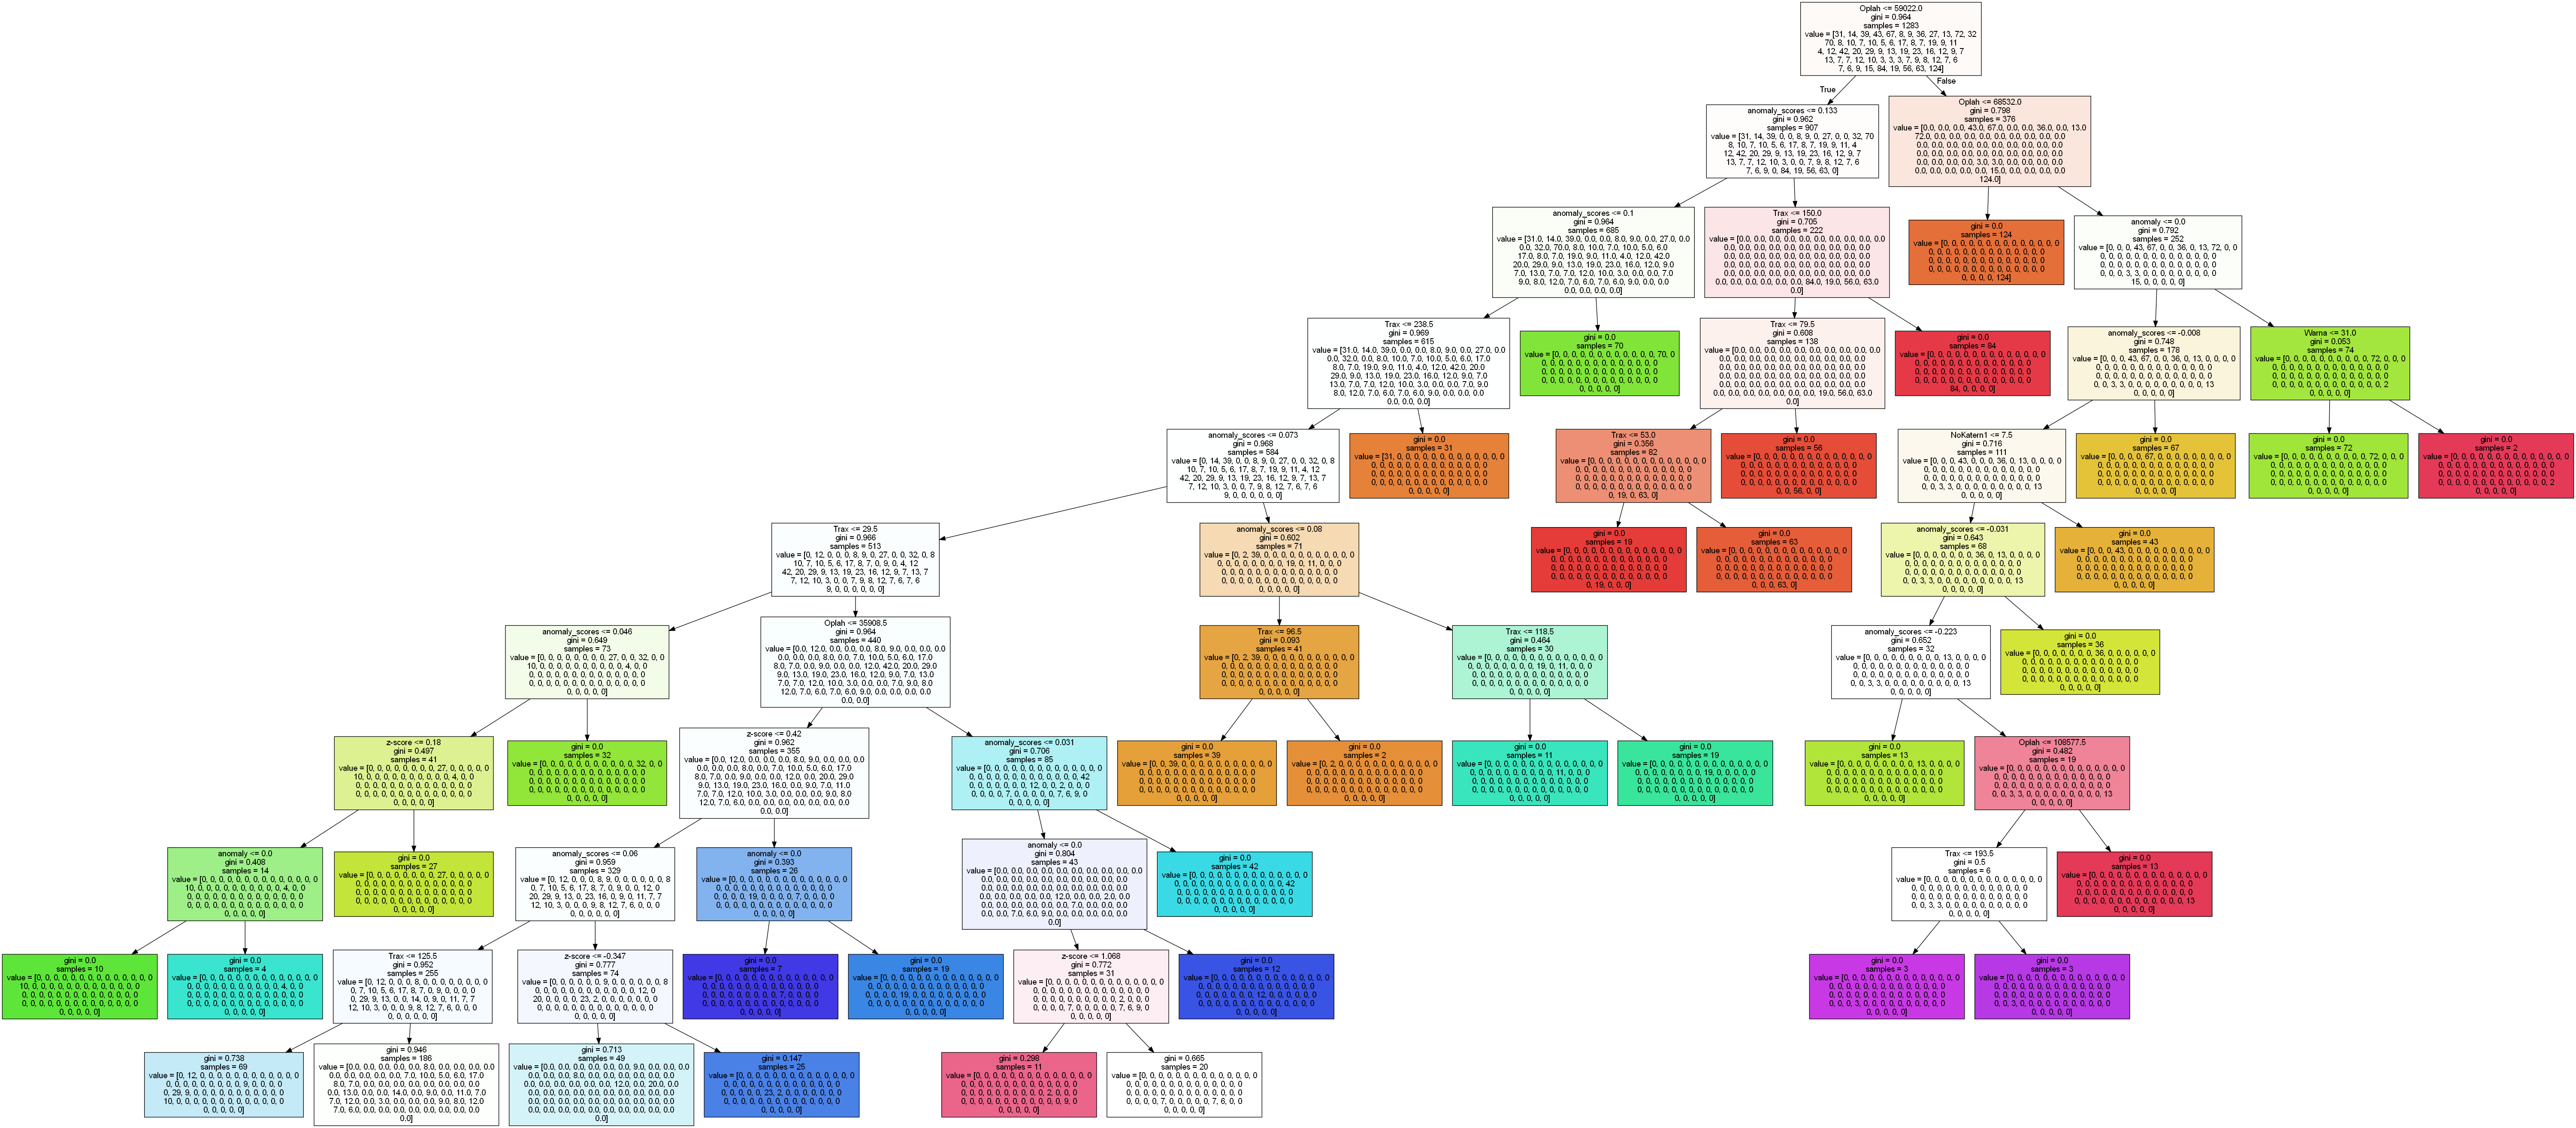

In [78]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
# graph[0].write_png('D:/bckup hdd lama/Kuliah/Semester 6/tree.png')

In [79]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [80]:
features

['Mesin',
 'Warna',
 'compute_0017',
 'compute_0018',
 'compute_0019',
 'compute_0020',
 'compute_0021',
 'compute_0022',
 'compute_0023',
 'compute_0024',
 'compute_0026',
 'compute_0027',
 'compute_0028',
 'compute_0029',
 'Shift',
 'Oplah',
 'Trax',
 'NoKatern1',
 'NoKatern2',
 'NamaPekerjaan',
 'NamaMesin',
 'anomaly_scores',
 'anomaly',
 'z-score',
 'baseline']

In [81]:
df_raw.rename(columns={'z-score': 'z_score'}, inplace=True)
df_raw

,Mesin,KodePekerjaan,NoOrder,Judul,Warna,Teller,HasilRusak,NamaMesin,NamaPekerjaan,compute_0017,...,menit,Unnamed: 42,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z_score,baseline,is_anomaly
0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Input NIK,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,0.017628,1,-0.272161,1,1
1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Gang.Unit Pembasah,NaN,...,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,0.017628,1,-0.272161,1,1
2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Starting,NaN,...,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,0.017628,1,-0.272161,1,1
3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,44,NaN,NaN,KBA,Starting,NaN,...,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,0.017628,1,-0.272161,1,1
4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,20,NaN,NaN,KBA,Input No. Order,NaN,...,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.276267,-1,7.588125,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Persiapan,NaN,...,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.052910,1,-0.644569,1,1
1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Produksi/cetak,NaN,...,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.052910,1,-0.644569,1,1
1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,2100.0,NaN,KBA,Input Teller Sementara,NaN,...,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.052910,1,-0.644569,1,1
1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,44,NaN,NaN,KBA,Gang.Gosok Blanket,NaN,...,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.052910,1,-0.644569,1,1


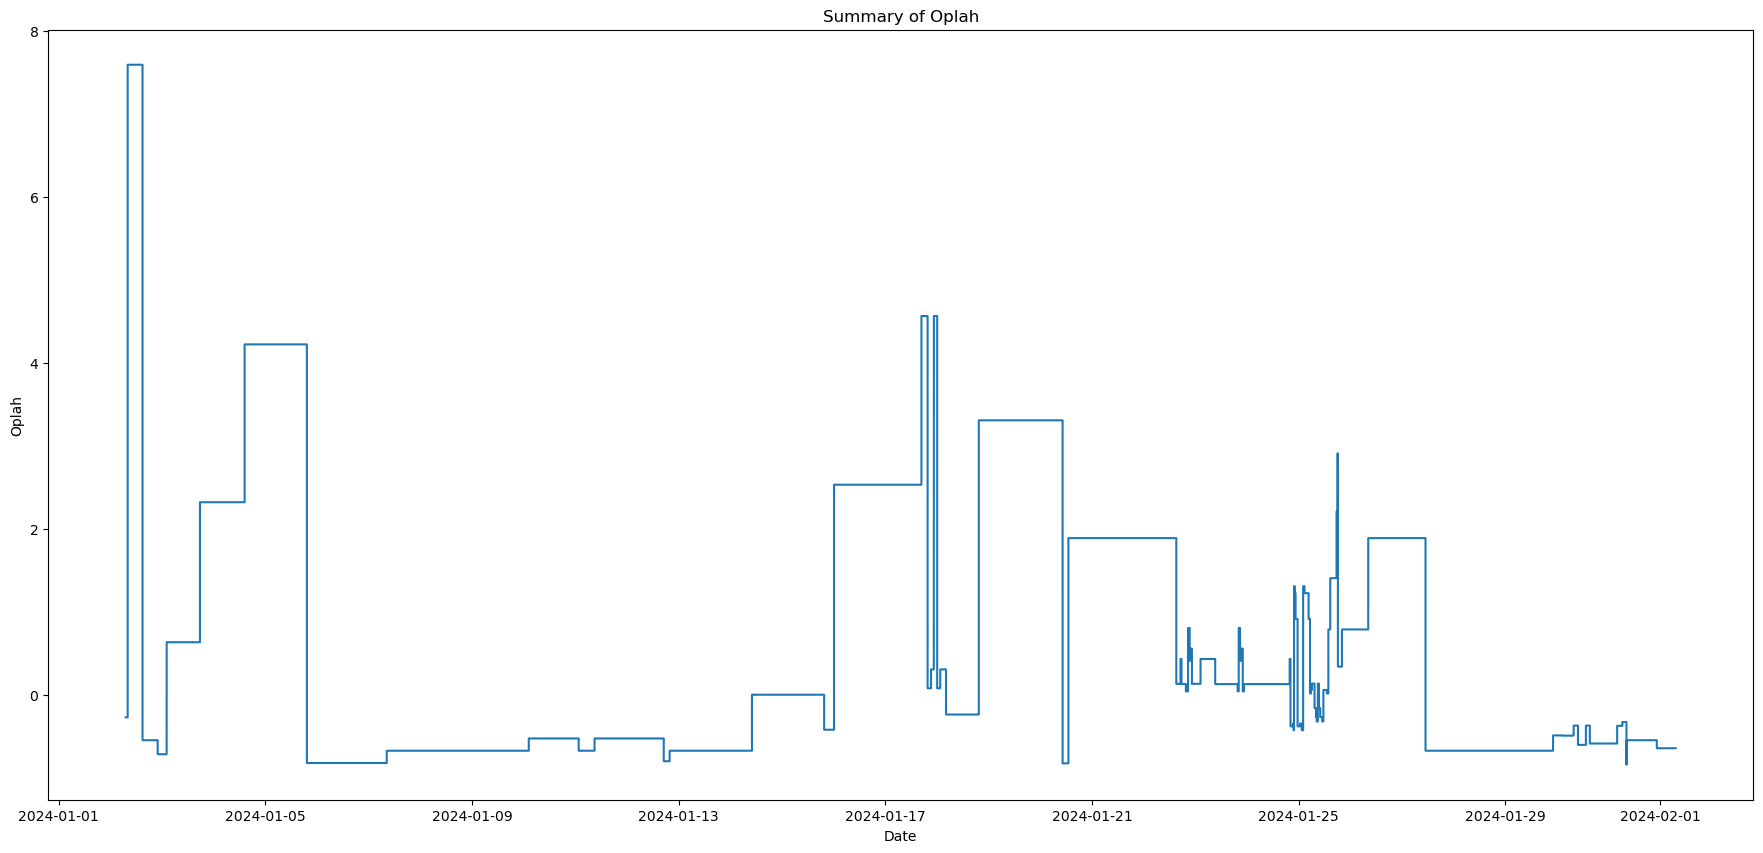

In [82]:
# df_raw["TanggalJamMulai1"] = pd.to_datetime(df_raw["TanggalJamMulai1"])
plt.figure(figsize=(22,10))
plt.plot(df_raw.TanggalJamSelesai,df_raw.z_score)
plt.title("Summary of Oplah")
plt.xlabel("Date")
plt.ylabel("Oplah")
plt.show()

In [83]:
# df_raw.to_excel("D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_proc2.xlsx")

In [84]:
df_raw.fillna(0,inplace=True)
# df_raw.to_csv('D:/bckup hdd lama/Kuliah/Semester 6/01_KBA_24_proc2.csv')

In [85]:
# # df_raw["TanggalJamMulai1"] = pd.to_datetime(df_raw["TanggalJamMulai1"])
# plt.figure(figsize=(22,10))
# plt.plot(df_raw.TanggalJamSelesai,df_raw.Oplah)
# plt.title("Summary of Oplah")
# plt.xlabel("Date")
# plt.ylabel("Oplah")
# plt.show()

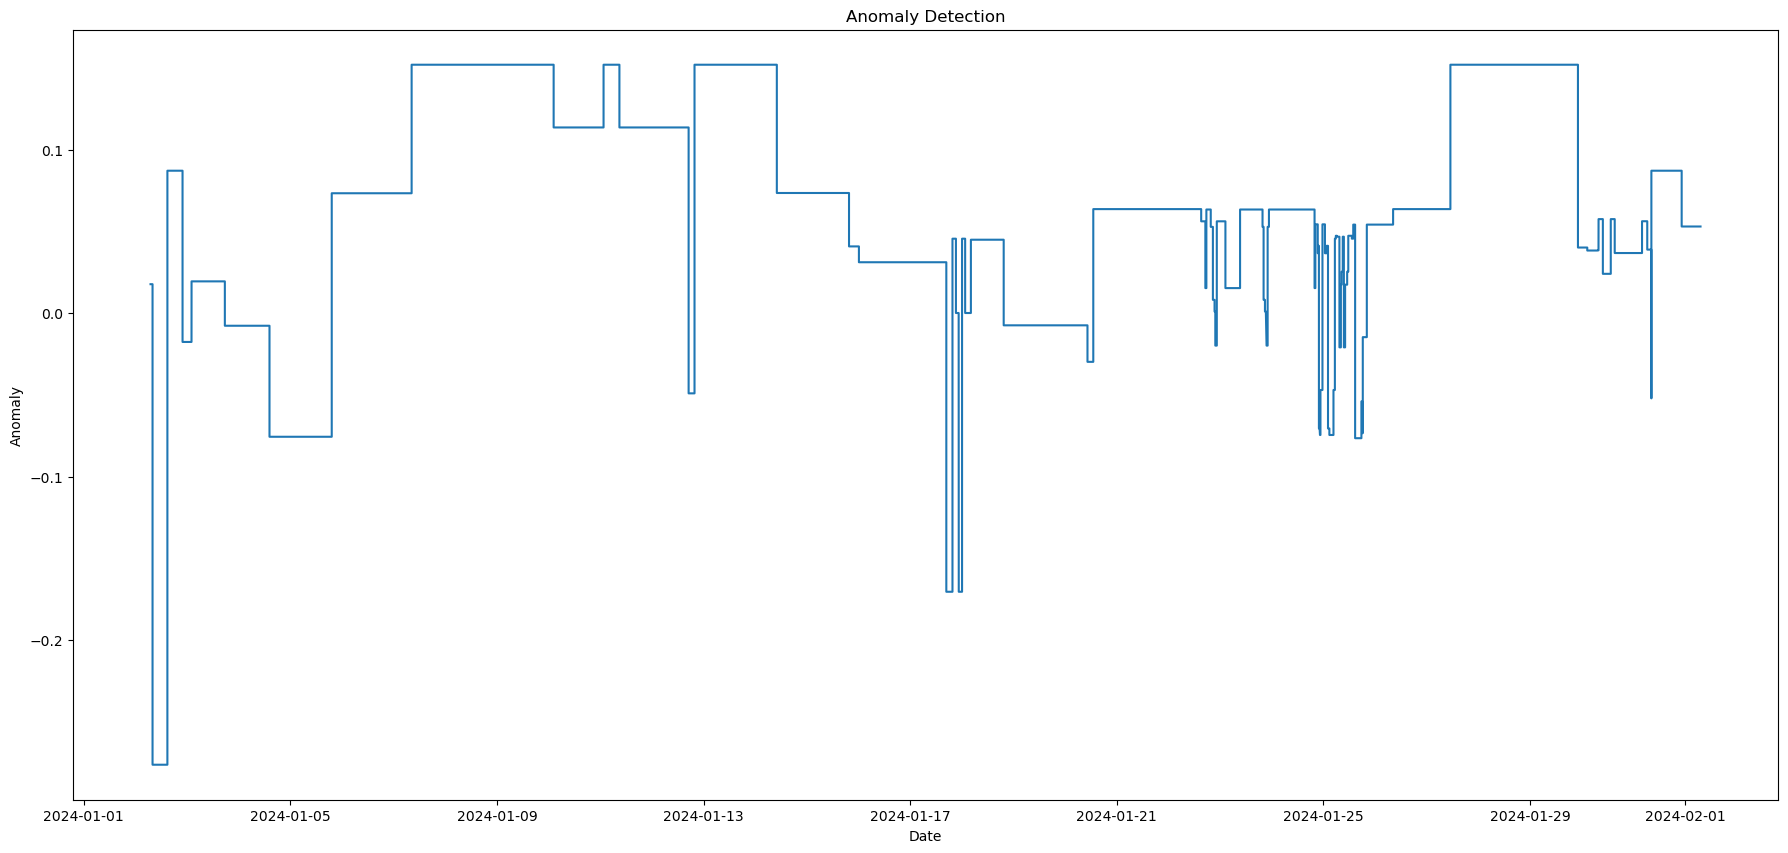

In [86]:
# df_raw["TanggalJamMulai1"] = pd.to_datetime(df_raw["TanggalJamMulai1"])
plt.figure(figsize=(22,10))
plt.plot(df_raw.TanggalJamSelesai,df_raw.anomaly_scores)
plt.title("Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Anomaly")
plt.show()

In [87]:
# df_raw['Produksi'].sum()

In [ ]:
# df_raw[df_raw.TanggalJamMulai=='2024-01-02 07:01:45']

In [ ]:
# # date_range = df_raw.set_index('TanggalJamMulai')
# df_raw['TanggalJamMulai'].loc['2024-01-02 07:01:45':'2024-05-02 23:23:18']
# date_range

In [ ]:
# start_date = '2024-01-02 07:01:45'
# end_date = '2024-05-02 23:23:18'
# mask = (df_raw['TanggalJamMulai'] > start_date) & (df_raw['TanggalJamMulai'] <= end_date) 
  
# dff = dff.loc[mask] 
# display(dff) 

In [55]:
df_final = pd.read_excel("D:/bckup hdd lama/Kuliah/Semester 6/Magang_PT. Antar Surya Jaya/01_KBA24_proc2.xlsx")
df_final

,Unnamed: 0,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,...,Menit2,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline
0,0,1,101,234710321,MAJALAH MPA EDISI JANUARI 2024,9,5,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,-0.006297,-1,-0.272161,1
1,1,1,48,234710321,MAJALAH MPA EDISI JANUARI 2024,9,5,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,-0.006297,-1,-0.272161,1
2,2,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,9,5,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,-0.006297,-1,-0.272161,1
3,3,1,0,234710321,MAJALAH MPA EDISI JANUARI 2024,9,5,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,-0.006297,-1,-0.272161,1
4,4,1,100,234720752,BUKU YASIN 128 PB NB GOLD DES '23,6,3,20,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.279841,-1,7.588125,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1829,1,1,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,4,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.052586,1,-0.644569,1
1830,1830,1,6,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,4,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.052586,1,-0.644569,1
1831,1831,1,500,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,4,44,2100.0,NaN,...,NaN,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.052586,1,-0.644569,1
1832,1832,1,53,244720360,AL HAROMAIN ED. FEBRUARI 2024,2,4,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.052586,1,-0.644569,1


In [67]:
df_final2 = df_final.apply(lambda x: x.replace({
    "MAJALAH MPA EDISI JANUARI 2024":"Product 1", 
    "BUKU YASIN 128 PB NB GOLD DES '23":"Product 2",
    "MAJALAH INSAN MANDIRI ED. JANUARI 2024" : "Product 3",
    "GAI0102 PEND. AG.ISLAM & BUDI KLS 1 SM 2" : "Product 4",
    "BUKU YASIN 128 PB NB BIRU SEPT '23" : "Product 5",
    "BK YASIN 128 BLOK PB HIJAU DES '23" : "Product 6",
    "ALFA MART DC SURABAYA ED. 02" : "Product 7",
    "BUMI, AYO BANGUN!" : "Product 8",
    "NAMA KAIN NENEK" : "Product 9",
    "BIMO SENANG MENGGAMBAR" : "Product 10",
    "RAHASIA KOTAK MERAH" : "Product 11",
    "CUT NYAK MEUTIA PAHLAWANKU" : "Product 12",
    "TK & PAUD SIAP MASUK SD ( REMORA )" : "Product 13",
    "CMN MPB & MAP FEBRUARI 2024" : "Product 14",
    "TK&PAUD MENULIS HURUF HIJAIYAH (REMORA)" : "Product 15",
    "KALENDER MEJA PT MMM 2024" : "Product 16",
    "TK&PAUD LANCARMNLIS HURUF&ANGKA (REMORA)" : "Product 17",
    "AL-QUR'AN KHAT ASY-SYIFA GARIS A4" : "Product 18",
    "AL-QUR'AN GARIS AR RAHMAN B5" : "Product 19",
    "BUKU YASIN 144 NB GOLD PB NOV '23" : "Product 20",
    "SS DPRD PROV SULAWESI BARAT 4" : "Product 21",
    "SAHABAT ANAS EDISI 151 FEBRUARI 2024" : "Product 22",
    "ALFA MART DC SURABAYA ED. 03" : "Product 23",
    "ALFA MIDI ED. 03 MAKASAR (NON BRANDING)" : "Product 24",
    "YATIM MANDIRI ED. FEBRUARI 2024" : "Product 25",
    "SS DPRD KAB KOLAKA TIMUR 1" : "Product 26",
    "SS DPRD KAB KOLAKA TIMUR 2" : "Product 27",
    "SS DPRD KAB KOLAKA TIMUR 3" : "Product 28",
    "SS DPRD KAB KOLAKA TIMUR 4" : "Product 29",
    "SS DPRD KAB KOLAKA UTARA 1" : "Product 30",
    "SS DPRD KAB KOLAKA UTARA 2" : "Product 31",
    "SS DPRD KAB KOLAKA UTARA 3" : "Product 32",
    "SS DPRD KAB KONAWE KEPULAUAN 1" : "Product 33",
    "SS DPRD KAB KONAWE KEPULAUAN 2" : "Product 34",
    "SS DPRD KAB KONAWE KEPULAUAN 3" : "Product 35",
    "SS DPRD KOTA KENDARI 2" : "Product 36",
    "SS DPRD KOTA KENDARI 3" : "Product 37",
    "SS DPRD KOTA KENDARI 4" : "Product 38",
    "SS DPRD KAB MUNA BARAT 1" : "Product 39",
    "SS DPRD KAB WAKATOBI 1" : "Product 40",
    "SS DPRD KAB WAKATOBI 2" : "Product 41",
    "SS DPRD KAB WAKATOBI 3" : "Product 42",
    "SS DPRD KAB WAKATOBI 4" : "Product 43",
    "SS DPRD KAB WAKATOBI 5" : "Product 44",
    "NURUL HAYAT ED. FEBRUARI  202" : "Product 45",
    "SS DPRD KAB POLEWALI MANDAR 5" : "Product 46",
    "SS DPRD KAB POLEWALI MANDAR 4" : "Product 47",
    "SS DPRD KAB POLEWALI MANDAR 3" : "Product 48",
    "SS DPRD KAB PASANGKAYU 2" : "Product 49",
    "THE LOMBOK GUIDE ED. FEBRUARI 2024" : "Product 50",
    "HS1227 KIMIA UNTUK SMA-MA KELAS 12" : "Product 51",
    "HS1226 BIOLOGI UNTUK SMA-MA KELAS 12" : "Product 52",
    "HS1205 MATEMATIKA TK LNJT UTK SMA KLS 12" : "Product 53",
    "HS1202 B.INDO TK LNJT-CAKAP BRB.INDO 12" : "Product 54",
    "HS1225 BHS INGGRS-LIFE TODAY SMA KLS 12" : "Product 55",
    "HS1213 GEOGRAFI UNTUK SMA/MA KELAS 12" : "Product 56",
    "HS1214 EKONOMI UNTUK SMA/MA KELAS 12" : "Product 57",
    "INSAN MANDIRI ED. FEBRUARI 2024" : "Product 58",
    "AL HAROMAIN ED. FEBRUARI 2024" : "Product 59"
}, regex=True))
# print("After replacing the string values of a single column:\n", df2)
df_final2
# df_final2.to_excel("D:/bckup hdd lama/Kuliah/Semester 6/Magang_PT. Antar Surya Jaya/Data_Intern ASJ")

,Unnamed: 0,Mesin,KodePekerjaan,NoOrder,Judul,NoKatern1,NoKatern2,Warna,Teller,HasilRusak,...,Menit2,Unnamed: 43,Unnamed: 44,ket 2,TanggalJamMulai,TanggalJamSelesai,anomaly_scores,anomaly,z-score,baseline
0,0,1,101,234710321,Product 1,9,5,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:45,2024-01-02 07:01:57,-0.006297,-1,-0.272161,1
1,1,1,48,234710321,Product 1,9,5,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:01:57,2024-01-02 07:29:01,-0.006297,-1,-0.272161,1
2,2,1,0,234710321,Product 1,9,5,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:29:01,2024-01-02 07:30:04,-0.006297,-1,-0.272161,1
3,3,1,0,234710321,Product 1,9,5,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:30:04,2024-01-02 07:58:11,-0.006297,-1,-0.272161,1
4,4,1,100,234720752,Product 2,6,3,20,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-01-02 07:58:11,2024-01-02 07:58:18,-0.279841,-1,7.588125,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1829,1,1,244720360,Product 59,2,4,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-02-01 06:18:28,2024-02-01 06:31:43,0.052586,1,-0.644569,1
1830,1830,1,6,244720360,Product 59,2,4,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-02-01 06:31:43,2024-02-01 06:37:00,0.052586,1,-0.644569,1
1831,1831,1,500,244720360,Product 59,2,4,44,2100.0,NaN,...,NaN,NaN,NaN,NaN,2024-02-01 06:37:00,2024-02-01 06:37:14,0.052586,1,-0.644569,1
1832,1832,1,53,244720360,Product 59,2,4,44,NaN,NaN,...,NaN,NaN,NaN,NaN,2024-02-01 06:37:14,2024-02-01 06:43:24,0.052586,1,-0.644569,1


In [68]:
df_final2.to_excel("D:/bckup hdd lama/Kuliah/Semester 6/Magang_PT. Antar Surya Jaya/Data_Intern ASJ.xlsx")

In [66]:
# pd.value_counts(df_final['Judul'])
# df_final['Judul'].value_counts()
for col in df_final.columns[1:]:
    print(col)
    print(df_final[col].unique())
    print()

Mesin
[1]

KodePekerjaan
[101  48   0 100   1   4  47  40   6  94  53 300  91  88 200 500 710   2
   3  36  90  50  68 730 740  37  49  78  92  46  55 900 700 801 720  98
  38  52  86  80]

NoOrder
[234710321 234720752 234710253 232110215 234720734 234720763 245514008
 249918006 249928006 239728050 239928861 239718076 239928874 239728076
 234710591 244710330 244720330 234710596 234702288 234720596 234720597
 234770611 234770606 234720745 239500596 239500682 239500647 244710215
 244730215 245514040 245505016 244710230 239500674 239500675 239500676
 239500677 239500664 239500665 239500666 239500678 239500679 239500680
 239500694 239500695 239500696 239500681 239500659 239500660 239500661
 239500662 239500663 244710200 239500615 239500614 239500613 239500601
 244720230 244720260 232010627 232010626 232010610 232010607 232010625
 232010614 232010615 244720245 244720360]

Judul
['MAJALAH MPA EDISI JANUARI 2024' "BUKU YASIN 128 PB NB GOLD DES '23"
 'MAJALAH INSAN MANDIRI ED. JANUARI 2024'
 '